# Demo: Multi-Class Classification
We're using the IRIS dataset, a classic machine learning dataset that illustrates both linearly separable and non-linearly separable classes.

3 different types of irises’ (Setosa, Versicolour, and Virginica). There are 4 features in the dataset: sepal length, sepal width, petal length, petal width.

This dataset is so famous it even has a [Wikepdia page](https://en.wikipedia.org/wiki/Iris_flower_data_set).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width=200 />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg" width=200 />
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg" width=200 />

In [1]:
import numpy as np
from sklearn import datasets, model_selection, linear_model, preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Loading the dataset
iris = datasets.load_iris()
x_raw = iris.data[:, :2] # using only first two features (sepal length, sepal width)
y = iris.target

num_samples, num_features = x_raw.shape
print(f"{num_samples = }, {num_features = }")

num_samples = 150, num_features = 4


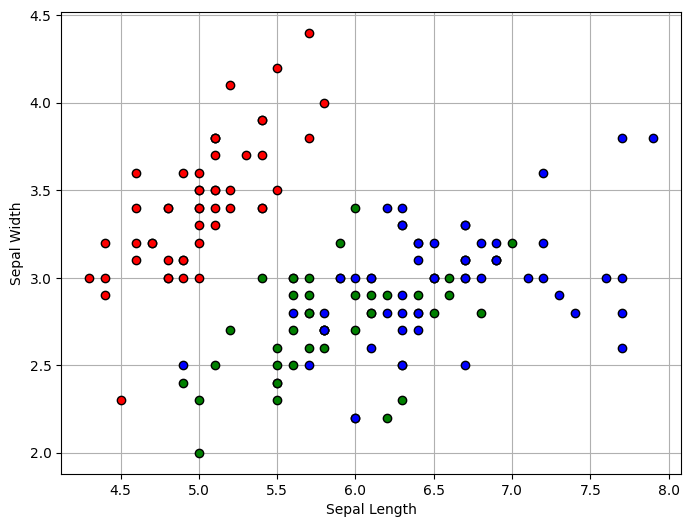

In [3]:
# y==0 picks the indicies corresponding to y equal zero
plt.figure(figsize=(8,6))
plt.rcParams['figure.figsize'] = [6, 4]
for y_val, color in zip(range(3), 'rgb'):
    plt.plot(
        x_raw[y == y_val, 0],
        x_raw[y == y_val, 1],
        'o',
        markerfacecolor=color,
        markeredgecolor='black'
    )

# remember this a 3-class classification problem!
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

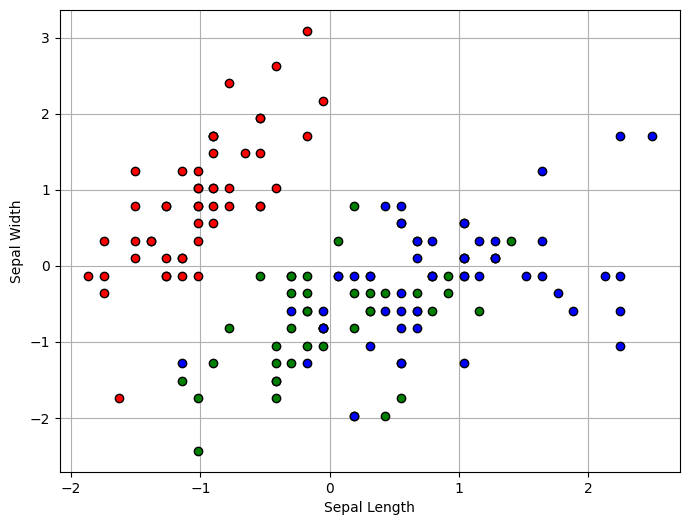

In [4]:
# normalizing the data
x = preprocessing.scale(x_raw)

# Plot it again and compare it with the data before normalization
plt.figure(figsize=(8,6))
plt.rcParams['figure.figsize'] = [6, 4]
for y_val, color in zip(range(3), 'rgb'):
    plt.plot(
        x[y == y_val, 0],
        x[y == y_val, 1],
        'o',
        markerfacecolor=color,
        markeredgecolor='black'
    )
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()

#### Split data into train and test dataset
Import model_selection from sklearn.

Use the `sklearn.model_selection` module to split your data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
# split the data into test and train (use 50% of the data as test set)
# We're not using ANY hyperparameters --- NO NEED FOR VALIDATION SET
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=42)


#### Fit a Logistic Model

Import linear_model from sklearn.

Use the `sklearn.linear_model` module to create a `LogisticRegression`.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Fit the model with training dataset.

In [24]:
# create logistic regression object
reg: linear_model.LogisticRegression = linear_model.LogisticRegression(random_state=42).fit(x_train, y_train)
# fit the model on the training data ONLY

Find the training and test accuracy of the model.

In [25]:
# HINT: use np.mean(y == y_pred)
y_pred_train: np.ndarray = reg.predict(x_train)
train_acc = (y_train == y_pred_train).mean()
y_pred_test: np.ndarray = reg.predict(x_test)
test_acc = (y_test == y_pred_test).mean()
print(f"{train_acc = :.3f}, {test_acc = :.3f}")

train_acc = 0.773, test_acc = 0.787


## Decision Boundary
[Code for plotting decission boundary](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

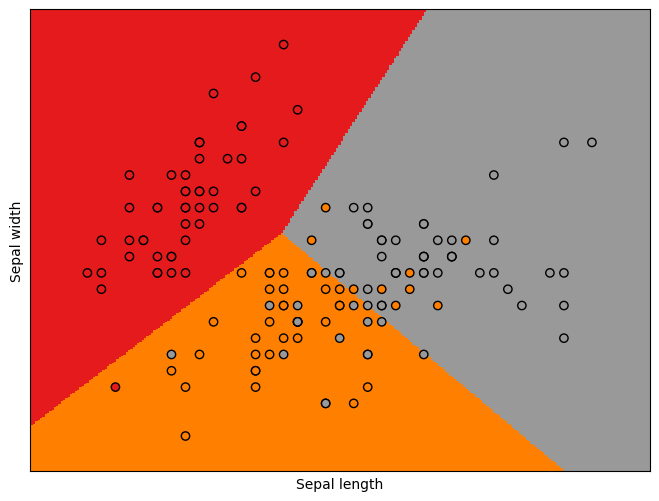

In [30]:
### CODE FROM SKLEARN IRIS DEMO ###

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(8,6))
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set1, shading='auto')

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Understanding The Classifications

### Class confidence outputs
In our print statement, the first column is our decision, cols 2-4 are our class proability outputs.

In [21]:
# showing the probabilities

# get the prediction probabilties for each class (test data)
# use the function predict_proba (look at the documentation)
yhat_probs_test = reg.predict_proba(x_test)

np.set_printoptions(precision=3, suppress=True)

# [class, prob_of_class_1, prob_of_class_2, prob_of_class_3]
print(np.hstack([y_pred_test[:, None], yhat_probs_test]))


[[1.    0.017 0.547 0.436]
 [0.    0.807 0.056 0.137]
 [2.    0.    0.218 0.782]
 [1.    0.036 0.526 0.438]
 [2.    0.001 0.361 0.638]
 [0.    0.736 0.137 0.127]
 [1.    0.14  0.563 0.297]
 [2.    0.002 0.239 0.759]
 [1.    0.001 0.742 0.257]
 [1.    0.032 0.653 0.315]
 [2.    0.017 0.292 0.69 ]
 [0.    0.809 0.153 0.038]
 [0.    0.741 0.117 0.142]
 [0.    0.824 0.133 0.043]
 [0.    0.978 0.01  0.012]
 [2.    0.054 0.295 0.65 ]
 [2.    0.008 0.364 0.627]
 [1.    0.027 0.76  0.213]
 [1.    0.069 0.619 0.312]
 [2.    0.005 0.469 0.525]
 [0.    0.936 0.049 0.015]
 [2.    0.037 0.46  0.502]
 [0.    0.924 0.048 0.028]
 [2.    0.005 0.469 0.525]
 [2.    0.    0.032 0.967]
 [2.    0.004 0.315 0.681]
 [1.    0.001 0.504 0.495]
 [2.    0.005 0.23  0.765]
 [0.    0.809 0.153 0.038]
 [0.    0.869 0.101 0.029]
 [0.    0.992 0.005 0.003]
 [0.    0.973 0.004 0.023]
 [2.    0.005 0.282 0.713]
 [0.    0.962 0.026 0.012]
 [0.    0.976 0.019 0.004]
 [1.    0.002 0.615 0.383]
 [2.    0.026 0.314 0.661]
 